In [ ]:
from tensorflow import keras
print(keras.__version__)

ModuleNotFoundError: No module named 'keras'

In [ ]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.layers import Dense

 

Load the Dataset

In [3]:
#"E:\handwrittenDigits\Data\mnist_test.csv"

tr1 = pd.read_csv("E:/handwrittenDigits/Data/mnist_train.csv")
te1 = pd.read_csv("E:/handwrittenDigits/Data/mnist_test.csv")

df = pd.concat([tr1, te1])

print(df.shape)

(70000, 785)


In [4]:
df.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
y = df['label'].values 
print(y.shape)
#x = df.loc[:, df.columns != 'label']

x = df.drop('label', axis=1).values.reshape(-1, 28, 28)
print(x.shape)

(70000,)
(70000, 28, 28)


In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [7]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(49000, 28, 28) (49000,)
(21000, 28, 28) (21000,)


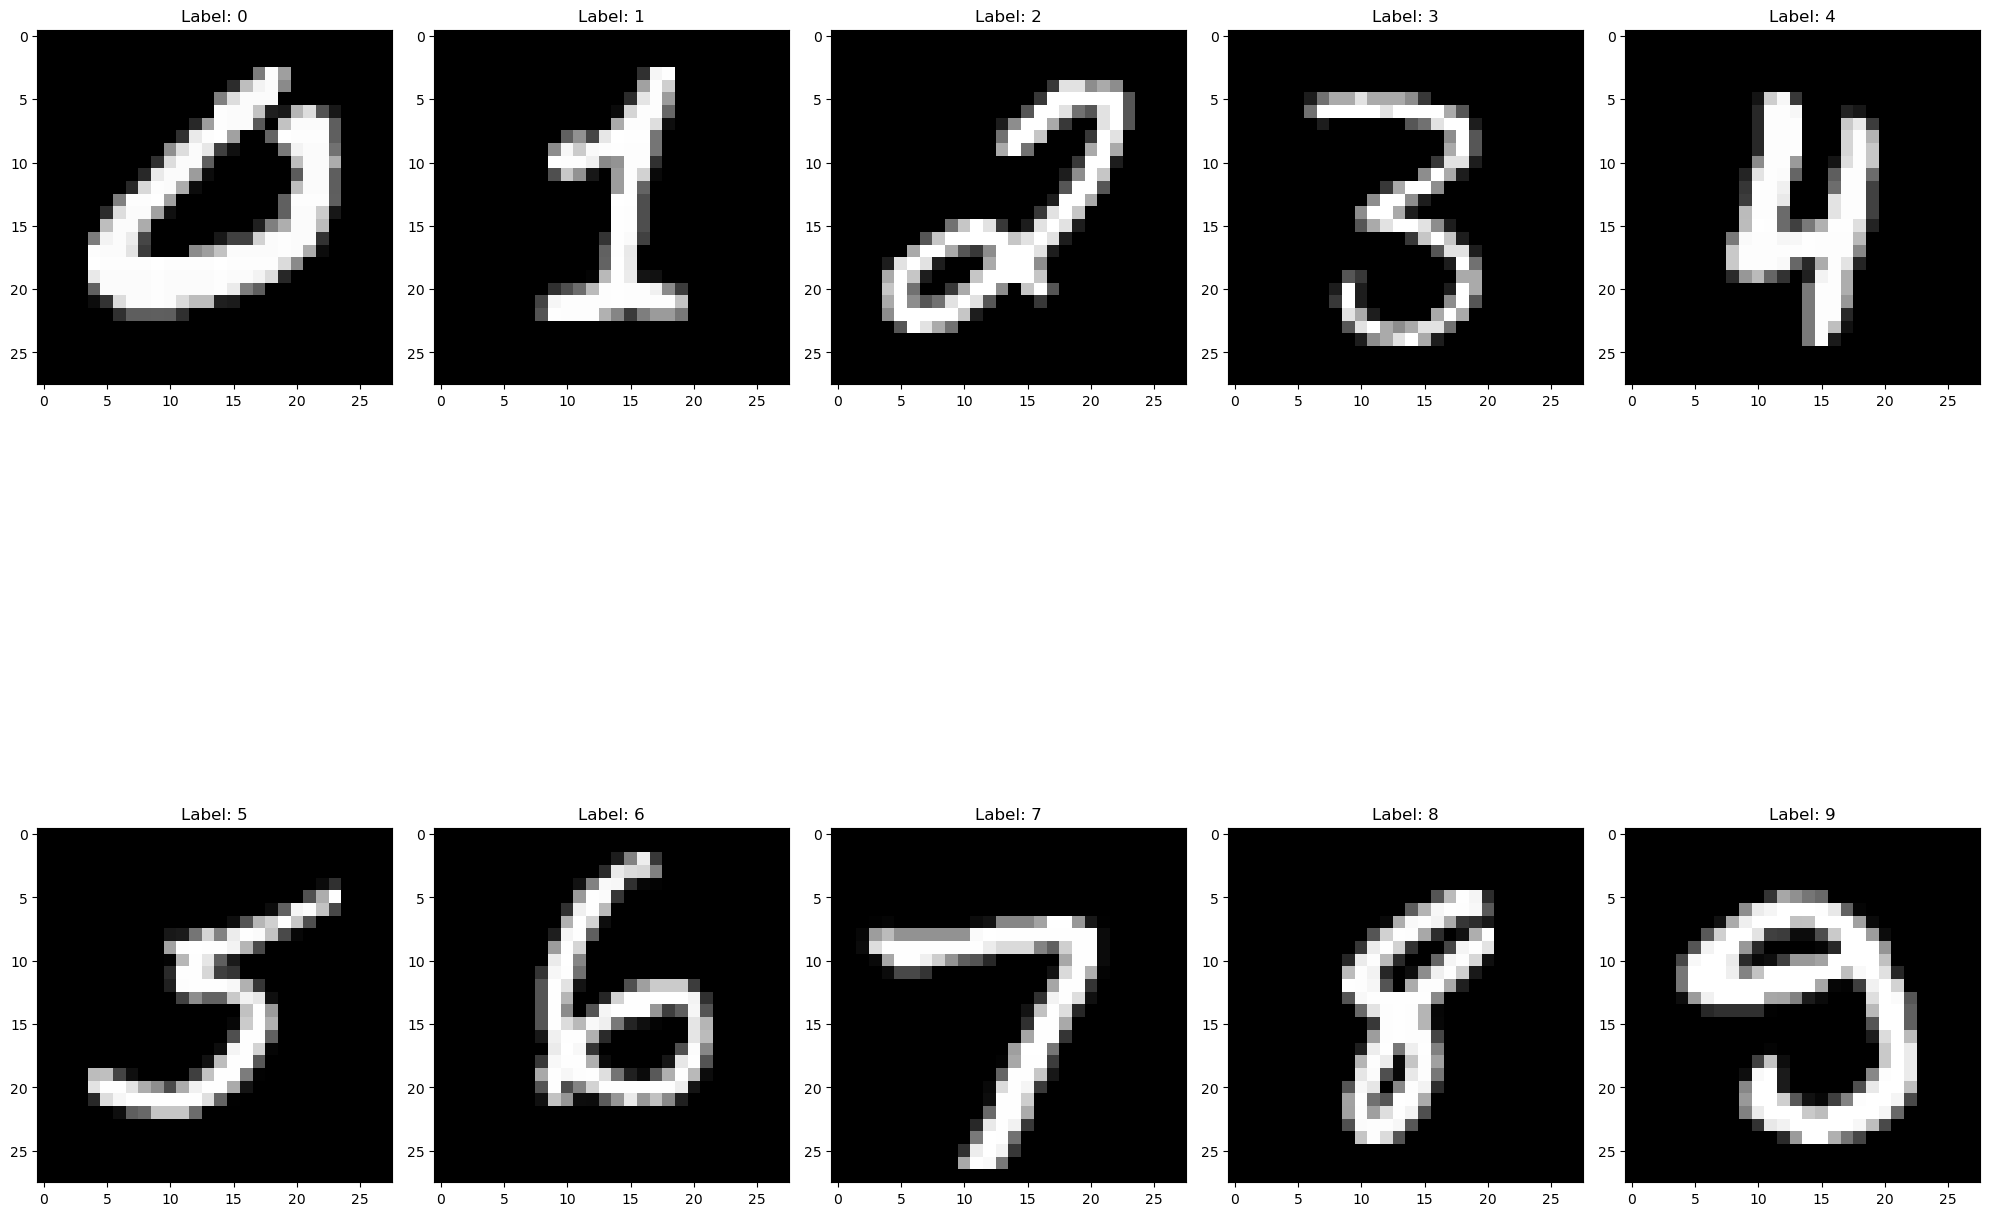

In [8]:
plt.figure(figsize=(20,20))

for digit in range(0,10):
    i = np.where(y==digit)[0]
    r = np.random.choice(i)
    plt.subplot(2,5, digit+1)
    plt.imshow(x[r], cmap='gray')
    plt.title(f'Label: {digit}')
plt.tight_layout()
plt.show()

In [9]:
y_train.shape

(49000,)

In [10]:
#to convert each digit into a 1d vector
d = 10
y_train = keras.utils.to_categorical(y_train, d)
y_test = keras.utils.to_categorical(y_test, d)

for i in range(10):
    print(y_train[i])

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [11]:
###lmaoaooaoao (49000, 10, 10, 10, 10) HOW THE HELLY

In [12]:
#time for normalisation

x_train = x_train/255.5
x_test = x_test/255.5

print(x_train.shape)
print(x_test.shape)

(49000, 28, 28)
(21000, 28, 28)


In [13]:
#28, 28 nadaaa we need 784, so flatten!!!!!!!
#trallalero = x_train
#trallala = x_test

x_train = x_train.reshape(x_train.shape[0],-1)
x_test = x_test.reshape(x_test.shape[0],-1)

print(x_train.shape)
print(x_test.shape)

(49000, 784)
(21000, 784)


In [14]:
#it's modelling time babyyyyy
#used all 3 for learning. will keep only one later

In [15]:
import random
activation_function = ['relu', 'sigmoid', 'tanh']
hide_and_seek=[2,3]
nodes1=[100,150]
nodes2=[150,100]

models=[]

for i in range(0,3):
    for layers in range(2):
        print("activation:", activation_function[i])
        
        model=Sequential()
        
        model.add(Dense(input_shape = (784,), units=784,  activation=activation_function[i]))
        
        for ii in range(hide_and_seek[layers]):
            model.add(Dense(units=nodes1[layers], activation= activation_function[i]))
            
        model.add(Dense(units=10, activation='softmax'))
        
        model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
        models.append(model)
        
        model.summary()
        print()

for i in range(0,3):
    for layers in range(2):
        print("activation:", activation_function[i])
        model=Sequential()
        model.add(Dense(input_shape = (784,), units=784,  activation=activation_function[i]))
        for ii in range(hide_and_seek[layers]):
            model.add(Dense(units=nodes2[layers], activation= activation_function[i]))
        model.add(Dense(units=10, activation='softmax'))
        model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
        models.append(model)
        model.summary()
        print()

for i in range(0,3):
    custom_activation = random.choice(activation_function)
    print("activation:", custom_activation)
    model = Sequential() 
    
    model.add(Dense(input_shape = (784,), units=784,  activation=custom_activation))
    l1 = random.randint(70,120)
    l2 = 150 - l1

    model.add(Dense(units=l1, activation=custom_activation))
    model.add(Dense(units=l2, activation=custom_activation))

    model.add(Dense(units=10,activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    models.append(model)
    model.summary()
    print()

activation: relu


c:\Users\Dell\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 784)            │       615,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 705,050 (2.69 MB)

 Trainable params: 705,050 (2.69 MB)

 Non-trainable params: 0 (0.00 B)


activation: relu


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 784)            │       615,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 150)            │       117,750 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 150)            │        22,650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 150)            │        22,650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │         1,510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 780,000 (2.98 MB)

 Trainable params: 780,000 (2.98 MB)

 Non-trainable params: 0 (0.00 B)


activation: sigmoid


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 784)            │       615,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 705,050 (2.69 MB)

 Trainable params: 705,050 (2.69 MB)

 Non-trainable params: 0 (0.00 B)


activation: sigmoid


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_13 (Dense)                │ (None, 784)            │       615,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 150)            │       117,750 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 150)            │        22,650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 150)            │        22,650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 10)             │         1,510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 780,000 (2.98 MB)

 Trainable params: 780,000 (2.98 MB)

 Non-trainable params: 0 (0.00 B)


activation: tanh


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                │ (None, 784)            │       615,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 705,050 (2.69 MB)

 Trainable params: 705,050 (2.69 MB)

 Non-trainable params: 0 (0.00 B)


activation: tanh


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_22 (Dense)                │ (None, 784)            │       615,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 150)            │       117,750 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 150)            │        22,650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 150)            │        22,650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 10)             │         1,510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 780,000 (2.98 MB)

 Trainable params: 780,000 (2.98 MB)

 Non-trainable params: 0 (0.00 B)


activation: relu


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_27 (Dense)                │ (None, 784)            │       615,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 150)            │       117,750 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 150)            │        22,650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 10)             │         1,510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 757,350 (2.89 MB)

 Trainable params: 757,350 (2.89 MB)

 Non-trainable params: 0 (0.00 B)


activation: relu


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_31 (Dense)                │ (None, 784)            │       615,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 715,150 (2.73 MB)

 Trainable params: 715,150 (2.73 MB)

 Non-trainable params: 0 (0.00 B)


activation: sigmoid


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_36 (Dense)                │ (None, 784)            │       615,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 150)            │       117,750 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 150)            │        22,650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 10)             │         1,510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 757,350 (2.89 MB)

 Trainable params: 757,350 (2.89 MB)

 Non-trainable params: 0 (0.00 B)


activation: sigmoid


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_40 (Dense)                │ (None, 784)            │       615,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 715,150 (2.73 MB)

 Trainable params: 715,150 (2.73 MB)

 Non-trainable params: 0 (0.00 B)


activation: tanh


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_45 (Dense)                │ (None, 784)            │       615,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ (None, 150)            │       117,750 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_47 (Dense)                │ (None, 150)            │        22,650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_48 (Dense)                │ (None, 10)             │         1,510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 757,350 (2.89 MB)

 Trainable params: 757,350 (2.89 MB)

 Non-trainable params: 0 (0.00 B)


activation: tanh


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_49 (Dense)                │ (None, 784)            │       615,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_50 (Dense)                │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_51 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_52 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_53 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 715,150 (2.73 MB)

 Trainable params: 715,150 (2.73 MB)

 Non-trainable params: 0 (0.00 B)


activation: sigmoid


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_54 (Dense)                │ (None, 784)            │       615,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_55 (Dense)                │ (None, 117)            │        91,845 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_56 (Dense)                │ (None, 33)             │         3,894 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_57 (Dense)                │ (None, 10)             │           340 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 711,519 (2.71 MB)

 Trainable params: 711,519 (2.71 MB)

 Non-trainable params: 0 (0.00 B)


activation: tanh


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_58 (Dense)                │ (None, 784)            │       615,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_59 (Dense)                │ (None, 120)            │        94,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_60 (Dense)                │ (None, 30)             │         3,630 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_61 (Dense)                │ (None, 10)             │           310 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 713,580 (2.72 MB)

 Trainable params: 713,580 (2.72 MB)

 Non-trainable params: 0 (0.00 B)


activation: relu


Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_62 (Dense)                │ (None, 784)            │       615,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_63 (Dense)                │ (None, 111)            │        87,135 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_64 (Dense)                │ (None, 39)             │         4,368 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_65 (Dense)                │ (None, 10)             │           400 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 707,343 (2.70 MB)

 Trainable params: 707,343 (2.70 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
epochs = 10

for i in range(len(models)):
    print("fit:",i+1)
    models[i].fit(x=x_train, y=y_train, epochs=epochs)
    print()

fit: 1


Epoch 1/10
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.8884 - loss: 0.3653
Epoch 2/10
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9708 - loss: 0.0945
Epoch 3/10
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9813 - loss: 0.0591
Epoch 4/10
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9853 - loss: 0.0454
Epoch 5/10
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9877 - loss: 0.0391
Epoch 6/10
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9905 - loss: 0.0296
Epoch 7/10
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9916 - loss: 0.0266
Epoch 8/10
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9934 - loss: 0.0205
Epoch 9/10
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9942 - loss: 0.0196
Epoch 10/10
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9954 - loss: 0.0145

fit: 2
Epoch 1/10
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.8793 - loss: 0.3873
Epoch 2/10
1

In [17]:
print(x_test.shape,y_test.shape)

(21000, 784) (21000, 10)


In [18]:
tloss =  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
taccuracy =  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

for i in range(len(models)):
    tloss[i], taccuracy[i] = models[i].evaluate(x_test, y_test)
    print("loss for model {} : {}, accuracy for model {} : {}".format(i+1, tloss[i], i+1, taccuracy[i]))
    print()

657/657 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9790 - loss: 0.1032
loss for model 1 : 0.10178357362747192, accuracy for model 1 : 0.9789524078369141

657/657 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9761 - loss: 0.1088
loss for model 2 : 0.10664847493171692, accuracy for model 2 : 0.9777619242668152

657/657 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9757 - loss: 0.1005
loss for model 3 : 0.09598889946937561, accuracy for model 3 : 0.976190447807312

657/657 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9703 - loss: 0.1286
loss for model 4 : 0.11839110404253006, accuracy for model 4 : 0.9717618823051453

657/657 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9727 - loss: 0.1013
loss for model 5 : 0.10063855350017548, accuracy for model 5 : 0.973714292049408

657/657 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9676 - loss: 0.1204
loss for model 6 : 0.11907979846000671, accuracy for model 6 : 0.9679047465324402

657/657 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0

In [19]:
predict_y = []
preditct_y_classes = []

for i,model in enumerate(models):
    print(f"Model:{i+1}")
    yp = model.predict(x_test,verbose=1)
    preditct_y_class = np.argmax(yp,axis=1)

    predict_y.append(yp)
    preditct_y_classes.append(preditct_y_class)

    print(predict_y)
    print(preditct_y_classes)
    print()

Model:1
657/657 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[array([[3.86293131e-09, 1.87981497e-09, 3.10755581e-08, ...,
        1.00000000e+00, 1.21787858e-09, 3.44385995e-08],
       [1.00000000e+00, 3.41053678e-11, 8.24212254e-09, ...,
        2.14059916e-11, 3.18579563e-09, 8.88305596e-10],
       [3.12591940e-15, 4.72522965e-10, 1.53104578e-11, ...,
        1.30852225e-14, 1.48923015e-13, 1.01296564e-07],
       ...,
       [1.00000000e+00, 1.04341498e-24, 2.16925965e-18, ...,
        4.84270789e-20, 1.09879163e-24, 6.53226515e-17],
       [9.50715709e-15, 3.83009666e-11, 1.00000000e+00, ...,
        4.54949571e-08, 4.49784476e-09, 1.81806593e-14],
       [5.92502603e-10, 7.38358766e-12, 1.80206577e-12, ...,
        7.63732466e-10, 1.72557790e-09, 1.00000000e+00]], dtype=float32)]
[array([7, 0, 4, ..., 0, 2, 9], dtype=int64)]

Model:2
657/657 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[array([[3.86293131e-09, 1.87981497e-09, 3.10755581e-08, ...,
        1.00000000e+00, 1.21787858e-09, 3.44385995e-08]

Model 1: Predicted = 0, True = 0


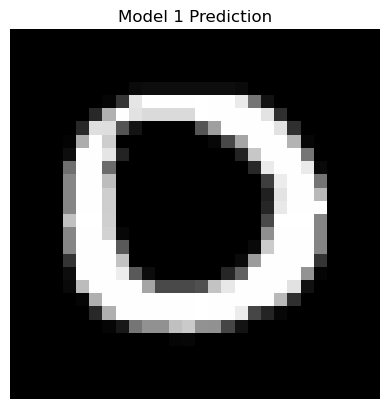

Model 2: Predicted = 5, True = 5


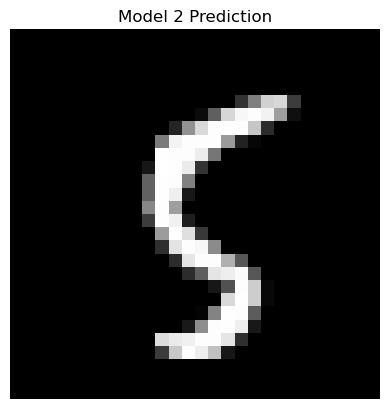

Model 3: Predicted = 5, True = 5


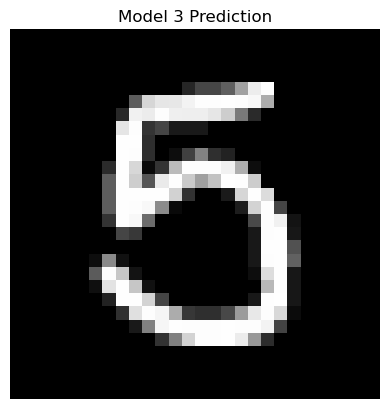

Model 4: Predicted = 3, True = 3


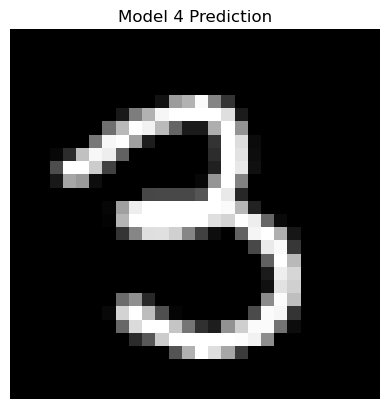

Model 5: Predicted = 5, True = 5


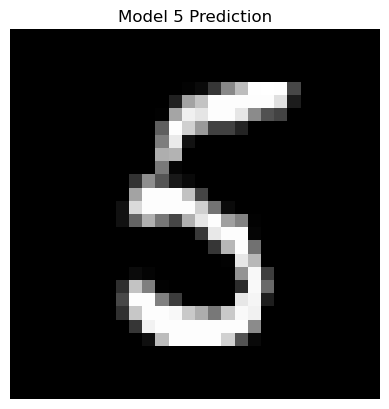

Model 6: Predicted = 9, True = 9


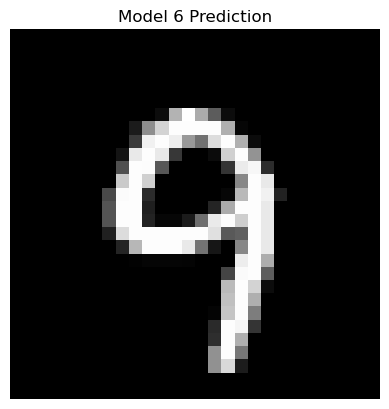

Model 7: Predicted = 0, True = 0


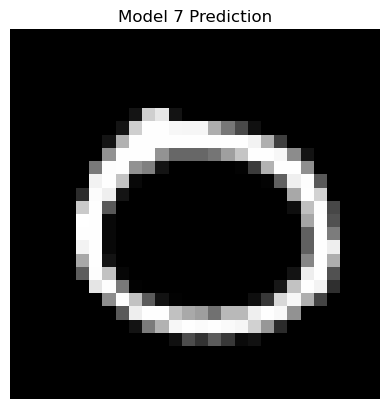

Model 8: Predicted = 6, True = 6


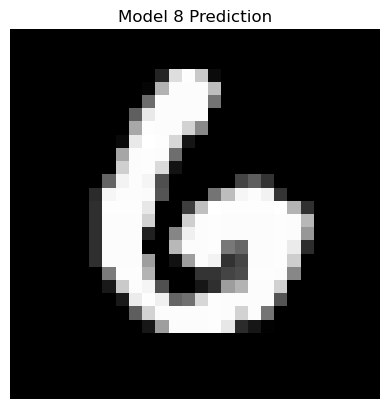

Model 9: Predicted = 7, True = 7


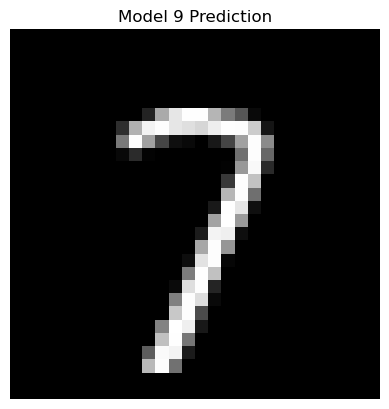

Model 10: Predicted = 2, True = 2


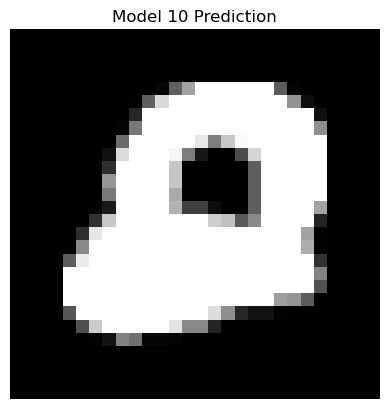

Model 11: Predicted = 1, True = 1


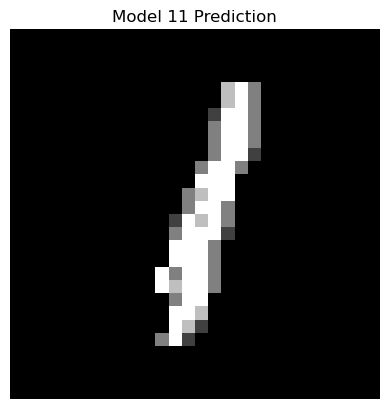

Model 12: Predicted = 6, True = 6


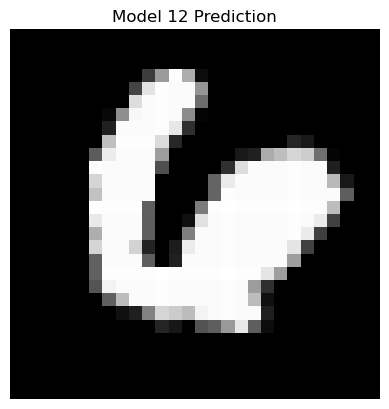

Model 13: Predicted = 3, True = 9


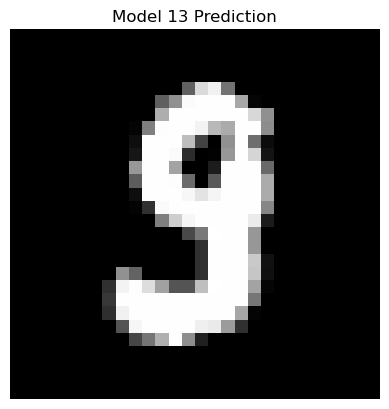

Model 14: Predicted = 6, True = 6


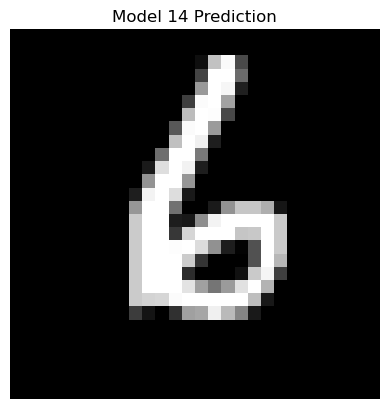

Model 15: Predicted = 5, True = 5


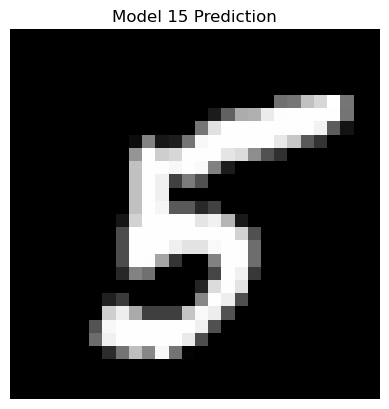

In [20]:
for i, model in enumerate(models):
    rand_idx = np.random.randint(len(x_test))

    img = x_test[rand_idx].reshape(28, 28)
    true_label = np.argmax(y_test[rand_idx])

    pred_label = preditct_y_classes[i][rand_idx]

    print(f"Model {i + 1}: Predicted = {pred_label}, True = {true_label}")
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.title(f"Model {i+1} Prediction")
    plt.show()

In [21]:
sorted_models = sorted(zip(models, taccuracy), key=lambda x: x[1], reverse=True)
for name, acc in sorted_models:
    print(f"{name}: {acc:.4f}")

<Sequential name=sequential, built=True>: 0.9790
<Sequential name=sequential_12, built=True>: 0.9788
<Sequential name=sequential_1, built=True>: 0.9778
<Sequential name=sequential_6, built=True>: 0.9771
<Sequential name=sequential_7, built=True>: 0.9771
<Sequential name=sequential_8, built=True>: 0.9771
<Sequential name=sequential_2, built=True>: 0.9762
<Sequential name=sequential_14, built=True>: 0.9738
<Sequential name=sequential_4, built=True>: 0.9737
<Sequential name=sequential_9, built=True>: 0.9732
<Sequential name=sequential_10, built=True>: 0.9722
<Sequential name=sequential_3, built=True>: 0.9718
<Sequential name=sequential_13, built=True>: 0.9704
<Sequential name=sequential_5, built=True>: 0.9679
<Sequential name=sequential_11, built=True>: 0.9620


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
predicted digit: 5


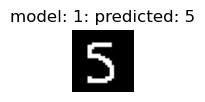

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
predicted digit: 5


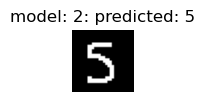

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
predicted digit: 5


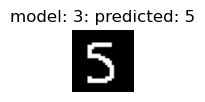

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
predicted digit: 5


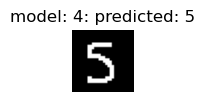

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
predicted digit: 5


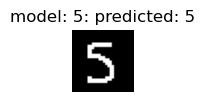

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
predicted digit: 5


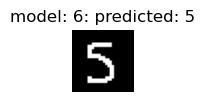

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
predicted digit: 5


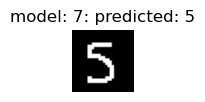

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
predicted digit: 5


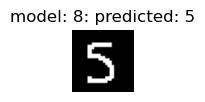

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
predicted digit: 5


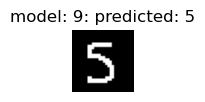

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
predicted digit: 5


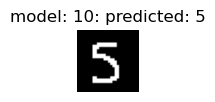

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
predicted digit: 5


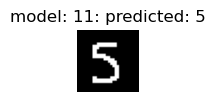

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
predicted digit: 3


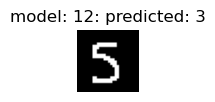

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
predicted digit: 5


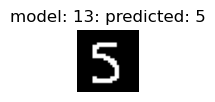

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
predicted digit: 5


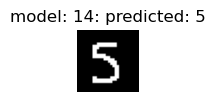

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
predicted digit: 5


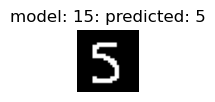

In [22]:

from PIL import Image

image_path = "C:/Users/Dell/Downloads/pixil-frame-0 (2).png"
img = Image.open(image_path).convert('L')

img=img.resize((28,28))

img_arr = np.array(img)

img_arr = img_arr/255.0

img_arr = (img_arr > 0.3).astype(float)

img_arr = img_arr.reshape(1, 784)

for i in range(len(models)):
    pred = models[i].predict(img_arr)
    
    pred_class = np.argmax(pred)
    
    print("predicted digit:",pred_class)
    plt.figure(figsize=(4,4))
    plt.subplot(2,5,digit+1)
   
    plt.imshow(img_arr.reshape(28,28), cmap='gray')
    plt.title(f"model: {i+1}: predicted: {pred_class}")
    plt.axis('off')
    plt.tight_layout()
    plt.show()

In [23]:

for i, prob in enumerate(pred[0]):
    print(f"Digit {i}: {prob:.4f}")


Digit 0: 0.0000
Digit 1: 0.0000
Digit 2: 0.0000
Digit 3: 0.0000
Digit 4: 0.0000
Digit 5: 1.0000
Digit 6: 0.0000
Digit 7: 0.0000
Digit 8: 0.0000
Digit 9: 0.0000
